# Final Project: COGS118A 

### First dataset: Parkinson Dataset

# 1. Setup

- Import necessary packages.
- Load dataset

In [5]:
# Installation
!pip install ucimlrepo

# General
import numpy as np
import os
import pandas as pd

# Data Formats
import gzip
import tarfile
import arff
from scipy.io import arff

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import normalize
from imblearn.over_sampling import SMOTE

# Data Split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# ML Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist

In [6]:
os.chdir('/Users/henrikformoe/Desktop/Github/final_project_COGS118A/parkinsons')
print(os.getcwd())

/Users/henrikformoe/Desktop/Github/final_project_COGS118A/parkinsons


In [7]:
# Load Parkinson's dataset

parkinsons = pd.read_csv('/Users/henrikformoe/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Github/final_project_COGS118A/parkinsons/parkinsons.data')
print(parkinsons.info())
print(parkinsons.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
# Check Parkinson's Dataset

print("Parkinson's Dataset:")
print(f"Shape: {parkinsons.shape}")
print(parkinsons.info())
print(parkinsons.head())

Parkinson's Dataset:
Shape: (195, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR   

# if needed: remove duplicats

eeg_alco_df = eeg_alco_df.drop_duplicates()

In [10]:
print("Duplicates Check:")
print(f"Parkinson's Dataset: {parkinsons.duplicated().sum()} duplicates")

Duplicates Check:
Parkinson's Dataset: 0 duplicates


# 2. Exploratory Data Analysis

- Summarize datasets. 
- Visualize features and check distributions. 

In [12]:
print(parkinsons.describe())

       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000

array([[<Axes: title={'center': 'MDVP:Fo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Fhi(Hz)'}>,
        <Axes: title={'center': 'MDVP:Flo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Jitter(%)'}>,
        <Axes: title={'center': 'MDVP:Jitter(Abs)'}>],
       [<Axes: title={'center': 'MDVP:RAP'}>,
        <Axes: title={'center': 'MDVP:PPQ'}>,
        <Axes: title={'center': 'Jitter:DDP'}>,
        <Axes: title={'center': 'MDVP:Shimmer'}>,
        <Axes: title={'center': 'MDVP:Shimmer(dB)'}>],
       [<Axes: title={'center': 'Shimmer:APQ3'}>,
        <Axes: title={'center': 'Shimmer:APQ5'}>,
        <Axes: title={'center': 'MDVP:APQ'}>,
        <Axes: title={'center': 'Shimmer:DDA'}>,
        <Axes: title={'center': 'NHR'}>],
       [<Axes: title={'center': 'HNR'}>,
        <Axes: title={'center': 'status'}>,
        <Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>,
        <Axes: title={'center': 'spread1'}>],
       [<Axes: title={'center': 'spread2'}>,
   

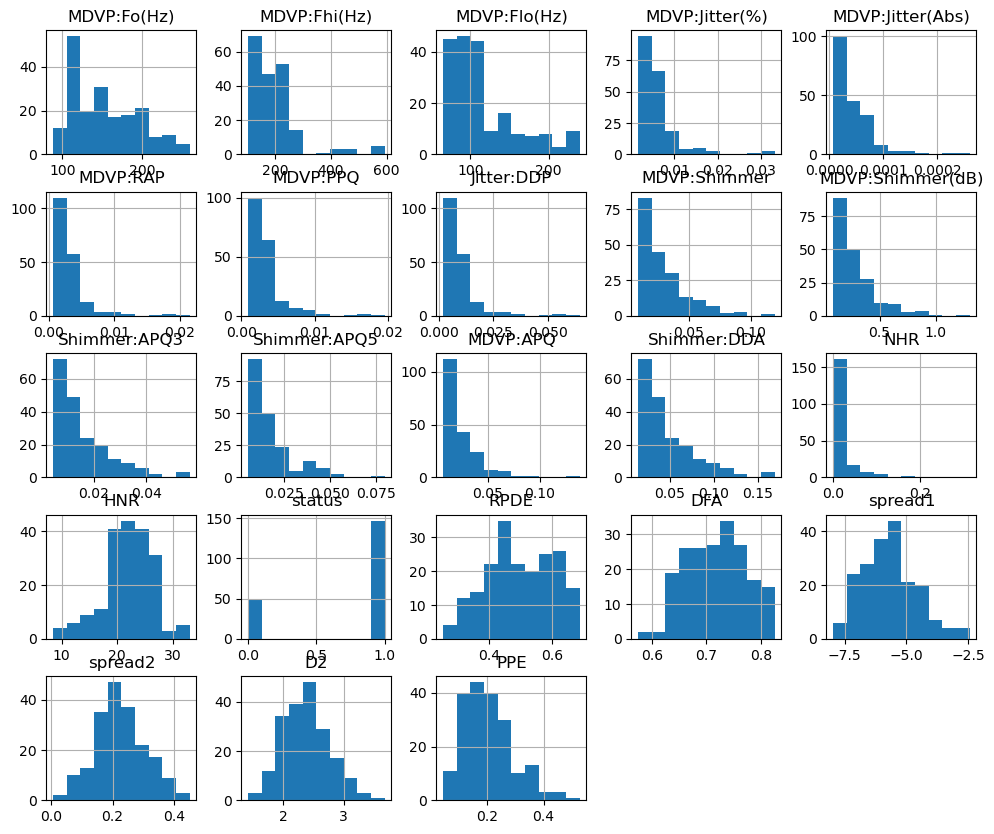

In [13]:
parkinsons.hist(figsize=(12, 10))

<Axes: >

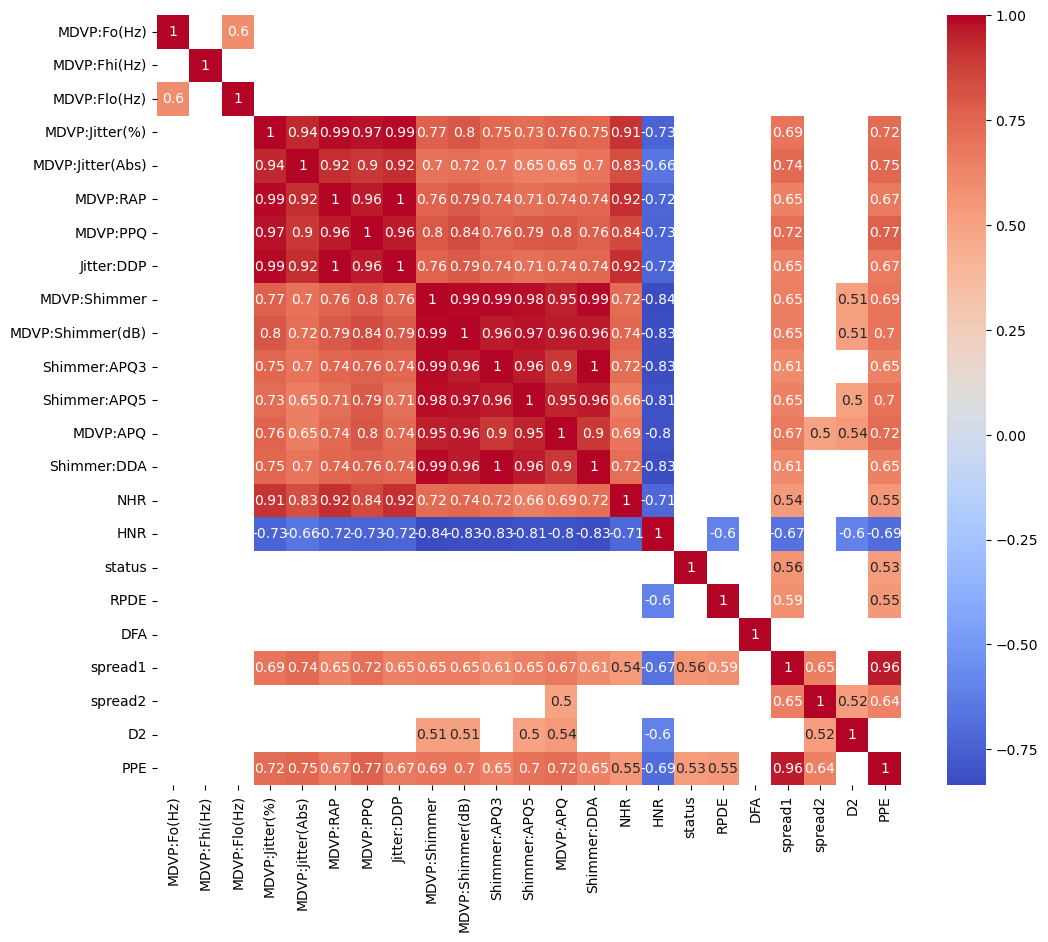

In [14]:
numeric_parkinsons = parkinsons.select_dtypes(include=[np.number])

corr = numeric_parkinsons.corr()
high_corr = corr[(corr > 0.5) | (corr < -0.5)]
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr, annot=True, cmap='coolwarm')

In [15]:
target_corr = numeric_parkinsons.corr()['status'].sort_values(ascending=False)
print(target_corr)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)       -0.166136
HNR                -0.361515
MDVP:Flo(Hz)       -0.380200
MDVP:Fo(Hz)        -0.383535
Name: status, dtype: float64


In [34]:
selected_features = target_corr[abs(target_corr) > 0.3].index
reduced_data = parkinsons[selected_features]
print(reduced_data.head())

   status   spread1       PPE   spread2  MDVP:Shimmer  MDVP:APQ  Shimmer:APQ5  \
0       1 -4.813031  0.284654  0.266482       0.04374   0.02971       0.03130   
1       1 -4.075192  0.368674  0.335590       0.06134   0.04368       0.04518   
2       1 -4.443179  0.332634  0.311173       0.05233   0.03590       0.03858   
3       1 -4.117501  0.368975  0.334147       0.05492   0.03772       0.04005   
4       1 -3.747787  0.410335  0.234513       0.06425   0.04465       0.04825   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:DDA        D2  MDVP:Jitter(Abs)  \
0             0.426       0.02182      0.06545  2.301442           0.00007   
1             0.626       0.03134      0.09403  2.486855           0.00008   
2             0.482       0.02757      0.08270  2.342259           0.00009   
3             0.517       0.02924      0.08771  2.405554           0.00009   
4             0.584       0.03490      0.10470  2.332180           0.00011   

       RPDE     HNR  MDVP:Flo(Hz)  MDVP:Fo(H

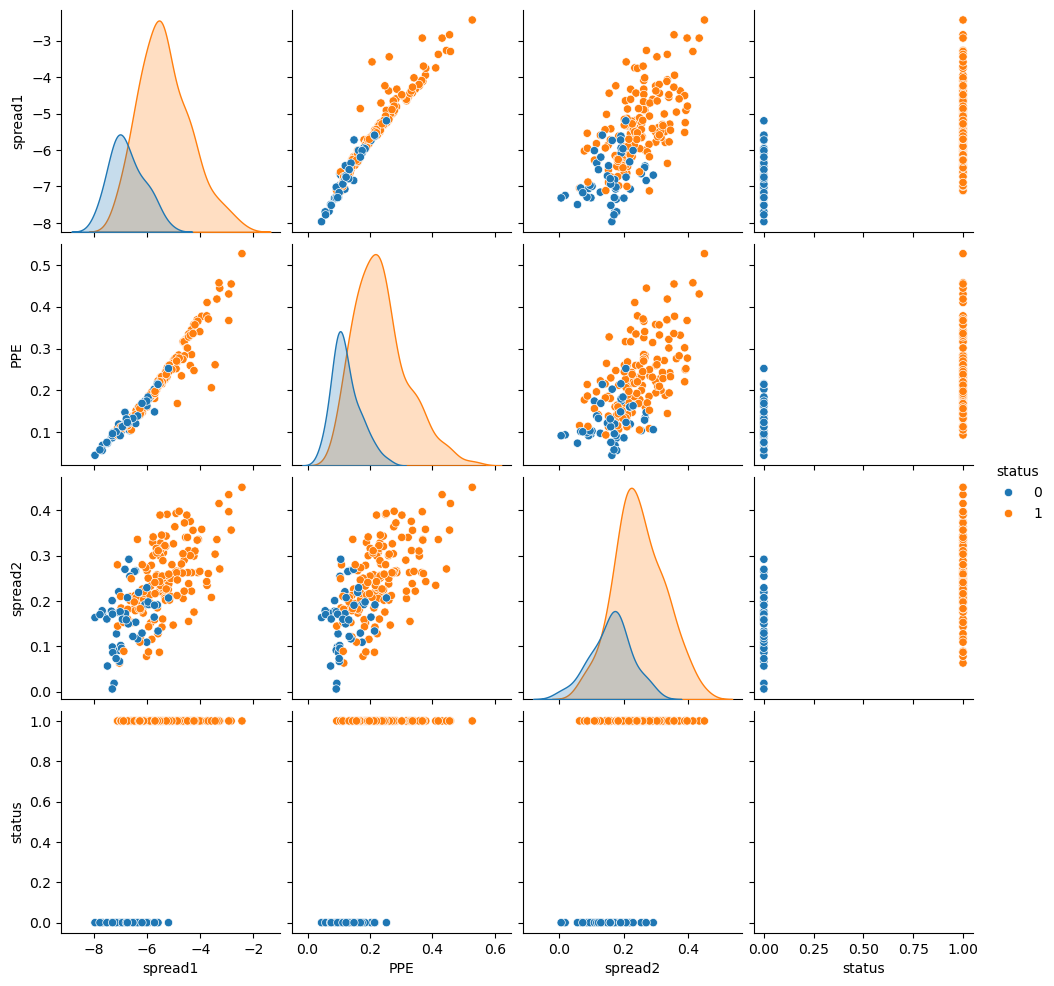

In [36]:
sns.pairplot(parkinsons, vars=['spread1', 'PPE', 'spread2', 'status'], hue='status')

# 3. Preprocessing 

- Handle missing values.
- Standardize data.
- Split into training and test data

In [38]:
# No missing values

print(parkinsons.isnull().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [41]:
# Scale dataset

scaler = StandardScaler()
features = reduced_data.drop(columns=['status'])
scaled_features = scaler.fit_transform(features)

scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['status'] = reduced_data['status'].values

# 4. Train and Evaluate Models

- Train Random Forests, KNN, and Neural Networks. 
- Compare performances

In [44]:
# Scaled data

X = scaled_data.drop(columns=['status'])
y = scaled_data['status']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
print(X_train.dtypes)
print(X_train.head())

spread1             float64
PPE                 float64
spread2             float64
MDVP:Shimmer        float64
MDVP:APQ            float64
Shimmer:APQ5        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:DDA         float64
D2                  float64
MDVP:Jitter(Abs)    float64
RPDE                float64
HNR                 float64
MDVP:Flo(Hz)        float64
MDVP:Fo(Hz)         float64
dtype: object
      spread1       PPE   spread2  MDVP:Shimmer  MDVP:APQ  Shimmer:APQ5  \
65  -1.498829 -1.279433 -2.647338     -0.651786 -0.694630     -0.523501   
104 -1.312459 -1.261111 -0.982435     -1.031933 -0.909382     -1.005455   
159  0.170994  0.112210  0.092385      0.140408  0.412259     -0.114923   
78   0.523432  0.594778  0.276274      0.122863  0.027717      0.081861   
76  -0.084209 -0.140549  1.378247      0.546607  0.175027      0.369533   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:DDA        D2  MDVP:Jitter(Abs)  \
65          -0.659807     -0.616579

In [76]:
# RF Model

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

print(classification_report(y_val, y_pred_rf))
feature_importances = rf.feature_importances_

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.90      0.97      0.94        38

    accuracy                           0.90        49
   macro avg       0.89      0.81      0.84        49
weighted avg       0.90      0.90      0.89        49



In [78]:
# KNeighbors Classifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)

print(classification_report(y_val, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.90      1.00      0.95        38

    accuracy                           0.92        49
   macro avg       0.95      0.82      0.86        49
weighted avg       0.93      0.92      0.91        49



In [52]:
# Multilayer Perceptron / Artifical Neural Network

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_val)

print(classification_report(y_val, y_pred_mlp))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.95      1.00      0.97        38

    accuracy                           0.96        49
   macro avg       0.97      0.91      0.94        49
weighted avg       0.96      0.96      0.96        49



# 5. Evaluation

/var/folders/kb/t8njst5d1qg_hr3b0_jq9s2r0000gn/T/ipykernel_38006/2259332564.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


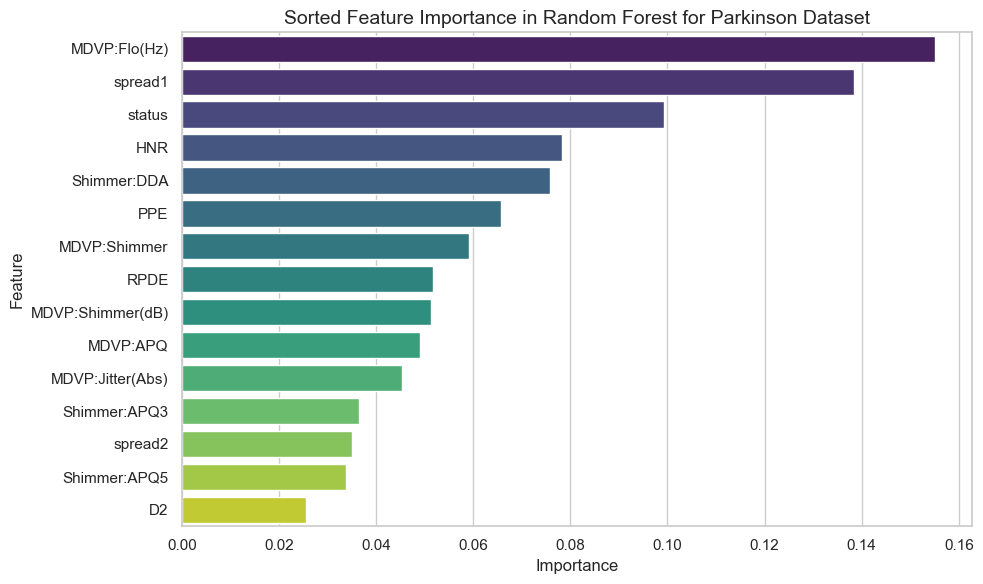

In [80]:
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [reduced_data.columns[i] for i in sorted_indices]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(
    x=np.array(feature_importances)[sorted_indices],
    y=sorted_features,
    palette="viridis",
    dodge=False
)

plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Sorted Feature Importance in Random Forest for Parkinson Dataset", fontsize=14)
plt.tight_layout()
plt.show()

In [59]:
print(f"Shape of feature_importances: {feature_importances.shape}")
print(f"Shape of reduced_data.columns[:-1]: {len(reduced_data.columns[:-1])}")

NameError: name 'feature_importances' is not defined

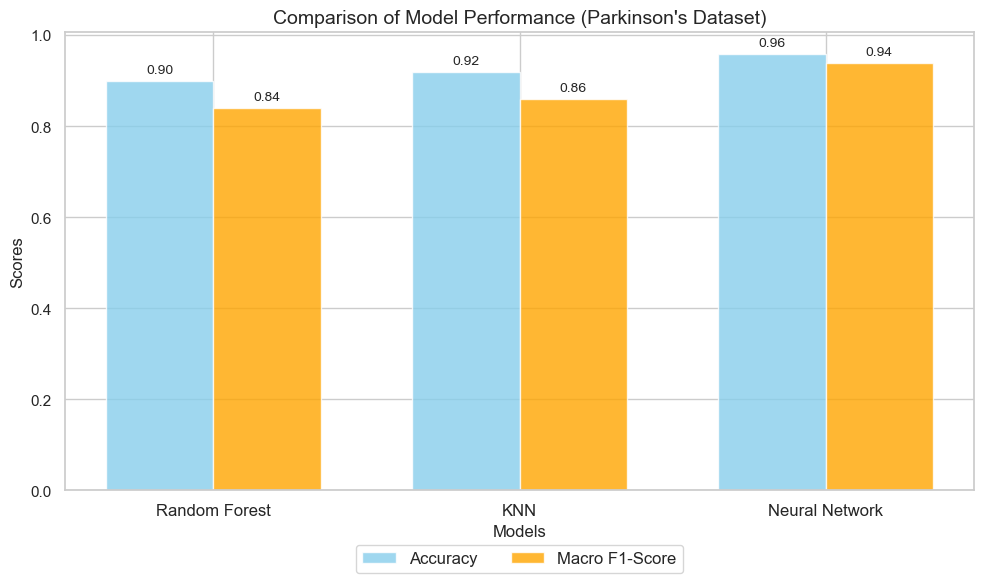

In [61]:
# Bar plot for the three ML models

models = ['Random Forest', 'KNN', 'Neural Network']

accuracies = [0.90, 0.92, 0.96]

macro_f1_scores = [0.84, 0.86, 0.94]


sns.set(style="whitegrid")

x = np.arange(len(models))

width = 0.35


fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue', alpha=0.8)

bar2 = ax.bar(x + width/2, macro_f1_scores, width, label='Macro F1-Score', color='orange', alpha=0.8)


ax.set_xlabel('Models', fontsize=12)

ax.set_ylabel('Scores', fontsize=12)

ax.set_title('Comparison of Model Performance (Parkinson\'s Dataset)', fontsize=14)

ax.set_xticks(x)

ax.set_xticklabels(models, fontsize=12)

ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)


for bar in bar1:

    height = bar.get_height()

    ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=10)


for bar in bar2:

    height = bar.get_height()

    ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=10)


plt.tight_layout()

plt.show()

## Confusion Matrices

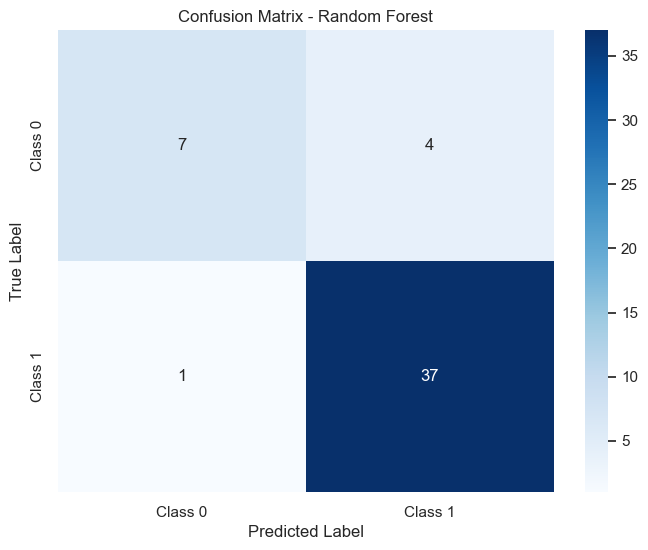

In [64]:
# Confusion Matrix - RF

cm = confusion_matrix(y_val, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

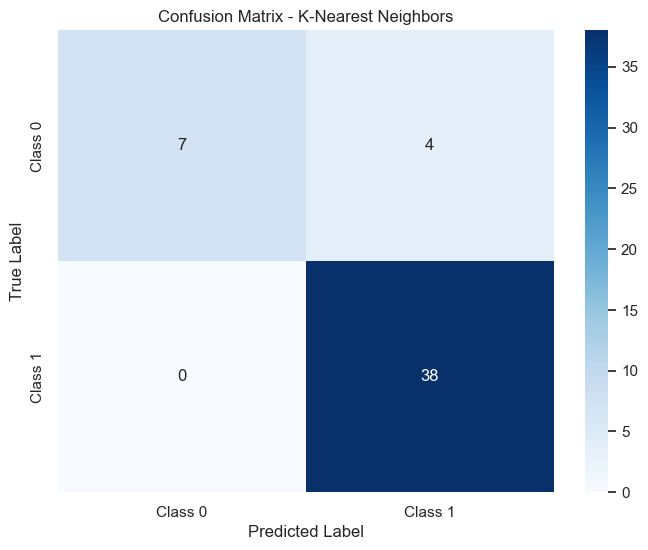

In [66]:
# Confusion Matrix - KNN

cm_knn = confusion_matrix(y_val, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.show()

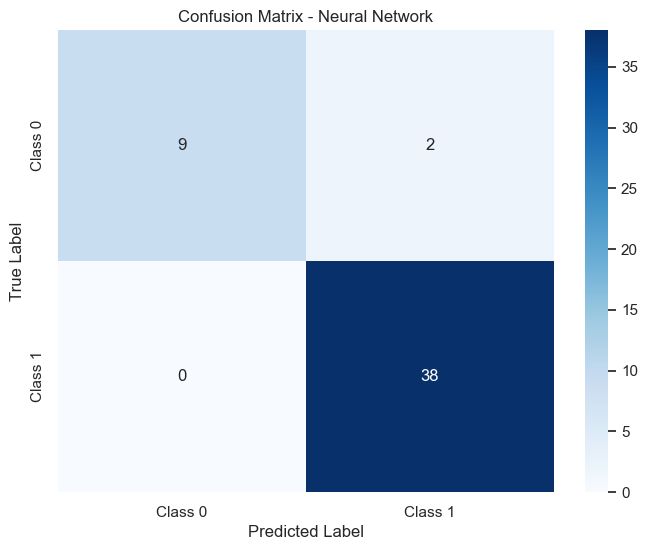

In [68]:
# Confusion Matrix - ANN

cm_nn = confusion_matrix(y_val, y_pred_mlp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Neural Network")
plt.show()